# Stochastic Gradient Descent
The Data has already been processed earlier. 
So I will use what I have.

## A First Pass

In [14]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import random 
random.seed(0)

pd.options.display.float_format = '{:.2f}'.format

In [15]:
os.getcwd()
#os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]

In [3]:
X_train.head()

,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,StateCode,Year1
1309,11.00,134.60,135735.00,254.90,397.60,0.00,0.00,0.00,9.00,9.00,231589.00,1841.10,95854.00,93731.00,7.00,25,34
1314,27.00,203.90,122024.00,263.60,486.40,0.00,0.00,0.00,12.00,12.00,221214.00,2336.30,99190.00,95794.00,17.40,25,39
2388,29.00,159.40,5666.00,50.40,507.70,5026.00,1308.00,159.40,190.00,229.00,37058.00,864.10,31392.00,28249.00,45.90,46,42
1156,1545.00,816.70,269339.00,3084.40,4080.70,0.00,0.00,0.00,224.00,224.00,836392.00,6839.30,567052.00,555201.00,24.30,22,34
1184,0.00,77.50,98124.00,392.50,725.90,0.00,0.00,0.00,0.00,0.00,288524.00,1450.20,190400.00,179268.00,8.40,23,11


Created a pipeline here.

In [4]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    SGDRegressor())
y_pred=reg.fit(X_train, y_train).predict(X_test)

In [5]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)


,true,predicted,how_off
0,958.10,958.02,0.01
1,623.90,624.53,-0.10


The results were actually really good right out of the box


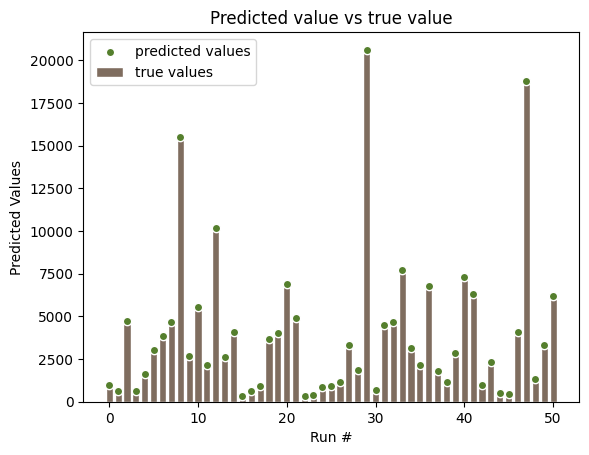

In [6]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [7]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 2.4909384864256037
Mean squared error 17.78716810043627
('Explained variance score', 0.999999052394054)
('R_2 score', 0.9999990271030984)


## Parameter Optimazation

Did not expect the model to perform so well. 
So there does not need to be much done at all. 



In [8]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=500,loss='huber'))
y_pred=reg.fit(X_train, y_train).predict(X_test)

c:\Users\amcfa\gitfiles\Projects\MastersWork\Short_ML_GradientDescent\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)

,true,predicted,how_off
0,958.10,51.35,94.64
1,623.90,51.51,91.74


In [10]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 3882.286425252689
Mean squared error 33304281.80976962
('Explained variance score', 0.002764998801576435)
('R_2 score', -0.8216296376738408)


### Changing the penatly term

Changing the penalty term from `l2` to `l1`. Improved results quite a bit. 

In [11]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(penalty='l1'))
y_pred=reg.fit(X_train, y_train).predict(X_test)

In [12]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)

,true,predicted,how_off
0,958.10,957.74,0.04
1,623.90,624.00,-0.02


In [13]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 0.9515905031620266
Mean squared error 1.394251383994719
('Explained variance score', 0.9999999510717904)
('R_2 score', 0.999999923739246)


# Results
Pretty straightforward actually. 


The SVR performed very well. With a prediction accuracy of 100%.
The `MAE` was 0.9834673843854801\
The `MSE` was 1.5266552927792496\
The `Explained variance` was 0.9999999450342941\
The $ R^2 $ was 0.9999999164972077